 ### Question 3

 Are there "groups" of countries that share characteristics among macroeconomic factors, and education rates among women, and/or women's rights in those countries? For example, do countries with greater rates of education among females and more equal rights among men and women have higher GDP or longer average lifespans?


 Target variable(s) from data set: N/A, this is an unsupervised learning question 
Task type: Clustering


In [1]:
#import packages

# general
import numpy as np
import pandas as pd

# sklearn

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, kmeans_plusplus
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn import metrics
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing 
from yellowbrick.features import PCA as PCA_viz
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# visualization
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
#load in the dataset
transformed_data = pd.read_csv('transformed_data.csv')
transformed_data.head()

,Unnamed: 0,Year,A woman can be head of household in the same way as a man (1=yes; 0=no),A woman can choose where to live in the same way as a man (1=yes; 0=no),A woman can get a job in the same way as a man (1=yes; 0=no),A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no),A woman can open a bank account in the same way as a man (1=yes; 0=no),A woman can register a business in the same way as a man (1=yes; 0=no),A woman can sign a contract in the same way as a man (1=yes; 0=no),A woman can travel outside her home in the same way as a man (1=yes; 0=no),...,Country Name_Ukraine,Country Name_United Arab Emirates,Country Name_United Kingdom,Country Name_United States,Country Name_Uruguay,Country Name_Uzbekistan,"Country Name_Venezuela, RB",Country Name_Viet Nam,Country Name_West Bank and Gaza,Country Name_Zimbabwe
0,0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,-0.7,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,0.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,4,0.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
transformed_data.columns

Index(['Unnamed: 0', 'Year',
       'A woman can be head of household in the same way as a man (1=yes; 0=no)',
       'A woman can choose where to live in the same way as a man (1=yes; 0=no)',
       'A woman can get a job in the same way as a man (1=yes; 0=no)',
       'A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)',
       'A woman can open a bank account in the same way as a man (1=yes; 0=no)',
       'A woman can register a business in the same way as a man (1=yes; 0=no)',
       'A woman can sign a contract in the same way as a man (1=yes; 0=no)',
       'A woman can travel outside her home in the same way as a man (1=yes; 0=no)',
       ...
       'Country Name_Ukraine', 'Country Name_United Arab Emirates',
       'Country Name_United Kingdom', 'Country Name_United States',
       'Country Name_Uruguay', 'Country Name_Uzbekistan',
       'Country Name_Venezuela, RB', 'Country Name_Viet Nam',
       'Country Name_West Bank and Gaza', 'Country Name

In [4]:
# Drop column that isn't real data
transformed_data = transformed_data.drop(columns=['Unnamed: 0'])

In [5]:
# Initialize data for model in dataframe called X
X = transformed_data
id_vars_names = X.columns[:53].tolist()

# Melt dataframe and make "Country" variable label encoded
X = X.melt(id_vars=id_vars_names, var_name='Country',value_name='CountryY/N')

X.loc[X['CountryY/N'] == 0, 'Country'] = np.nan

X = X.dropna(subset=['Country'])
X = X.drop(columns='CountryY/N')

label_encoder = preprocessing.LabelEncoder() 

# Update model data with new label encoded Country column 
X['Country Label'] = label_encoder.fit_transform(X['Country']) 

# Create separate dataframe not used for models that stores the Country Names
X_withCountry = X

# Remove non-numeric Country column from data for model
X = X.drop(columns='Country')
X

,Year,A woman can be head of household in the same way as a man (1=yes; 0=no),A woman can choose where to live in the same way as a man (1=yes; 0=no),A woman can get a job in the same way as a man (1=yes; 0=no),A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no),A woman can open a bank account in the same way as a man (1=yes; 0=no),A woman can register a business in the same way as a man (1=yes; 0=no),A woman can sign a contract in the same way as a man (1=yes; 0=no),A woman can travel outside her home in the same way as a man (1=yes; 0=no),A woman can work at night in the same way as a man (1=yes; 0=no),...,The law prohibits discrimination in access to credit based on gender (1=yes; 0=no),The law prohibits discrimination in employment based on gender (1=yes; 0=no),The law provides for the valuation of nonmonetary contributions (1=yes; 0=no),The mandatory retirement age for men and women is the same (1=yes; 0=no),There are periods of absence due to childcare accounted for in pension benefits (1=yes; 0=no),There is legislation specifically addressing domestic violence (1=yes; 0=no),There is paid parental leave (1=yes; 0=no),"Vocational and Technical enrolment (% of total secondary enrolment), total",Share of STEM Graduates,Country Label
7,-0.3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.394159,1.074265,0
8,-0.1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.322957,1.161942,0
9,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.383511,1.307281,0
10,0.1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.388668,1.312005,0
11,0.5,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.685997,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143509,0.8,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,-0.798411,0.890969,133
144581,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,-1.181184,134
144582,0.1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,-0.614411,134
144583,0.2,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,-0.595872,134


#### Data Exploration for potentially relevant variables

<Axes: xlabel='School enrollment, secondary, female (% gross)', ylabel='Share of STEM Graduates'>

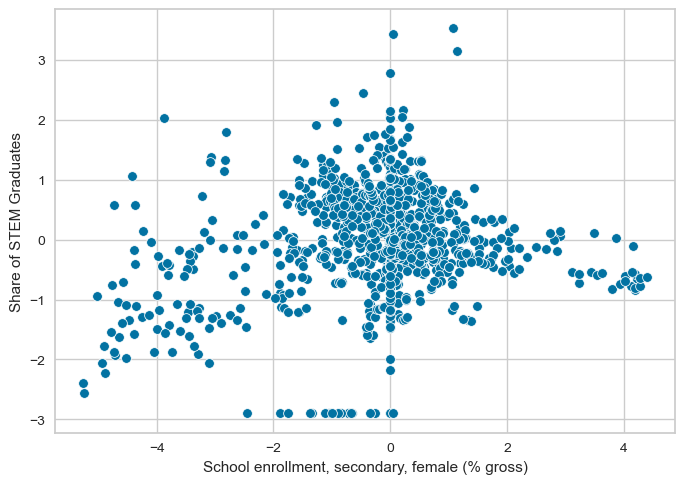

In [6]:
# Visualize School Enrollment for females in secondary school vs. Share of STEM graduates, which were variables of interest in question 1 + 2
sns.scatterplot(data=X, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates')

<Axes: xlabel='Fertility rate, total (births per woman)', ylabel='Length of paid parental leave for mother (calendar days)'>

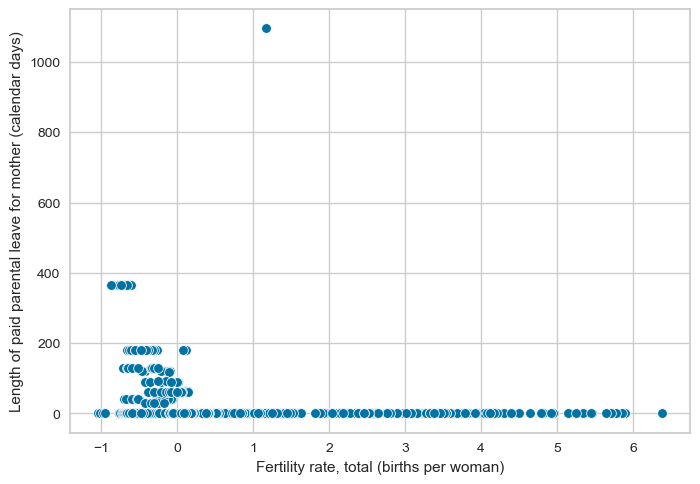

In [7]:
# Visualize two more variables with numeric data - Fertility rate and length of paid parental leave for mother
sns.scatterplot(data=X, x='Fertility rate, total (births per woman)', y='Length of paid parental leave for mother (calendar days)')

#### Model 1: KMeans Clustering

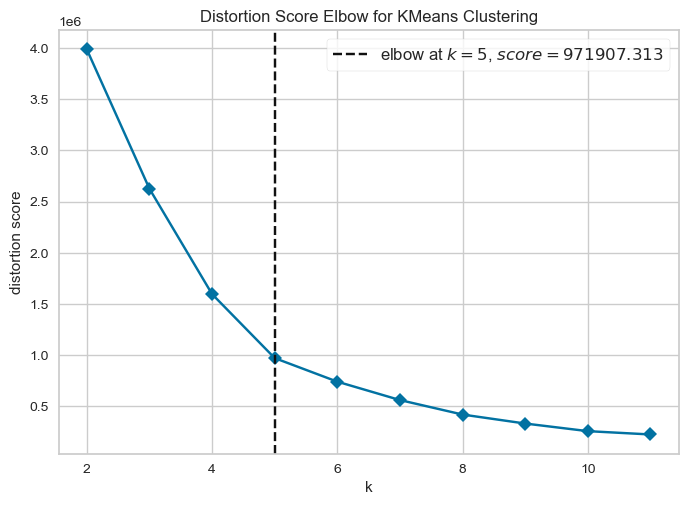

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
#Create a Kmeans model and plot the number of Ks between 2 and 12
seed = 17

model = KMeans(random_state=seed, n_init=10)

visualizer = KElbowVisualizer(model, k=(2,12), timings=False)
visualizer.fit(X)
visualizer.show()

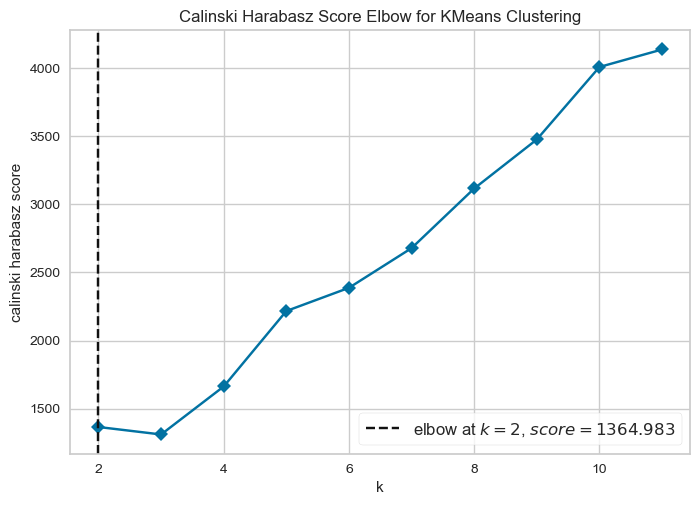

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [9]:
#Create a Kmeans model and plot the number of Ks between 2 and 12 using calinski_harabasz score

model = KMeans(random_state=seed, n_init=10)
visualizer = KElbowVisualizer(model, k=(2,12), timings=False, metric='calinski_harabasz', locate_elbow=True)
visualizer.fit(X)
visualizer.show()

The K values for these two different scores are different. 

To learn more about what k value might be best visually, plot a silhouette plot. 

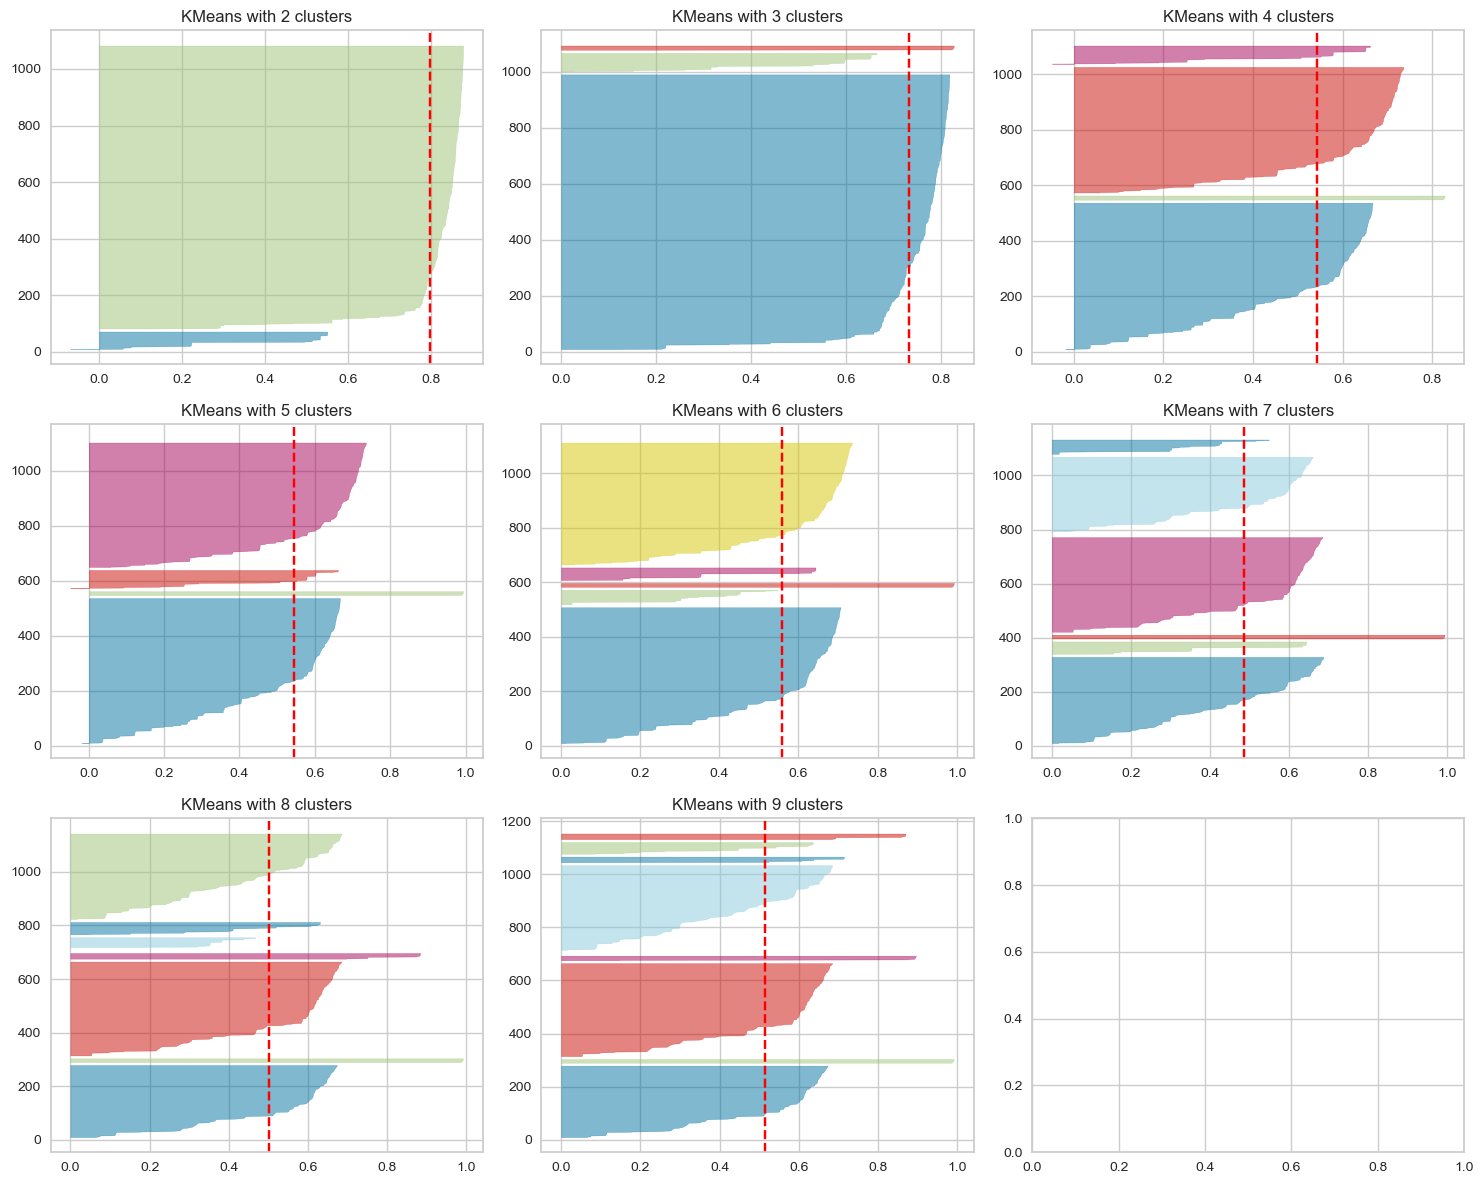

In [10]:
# Create a subplot grid
fig, ax = plt.subplots(3, 3, figsize=(15, 12))
j = 0
h = 0

for i in range(2, 10):

    # Initialize the KMeans model
    model = KMeans(random_state=seed, n_clusters=i, n_init = 10)

    # Create a SilhouetteVisualizer for the current model
    viz = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[h][j])

    # Fit the visualizer
    viz.fit(X)

    # Set the title for each subplot
    ax[h][j].set_title(f'KMeans with {i} clusters')

    # Update the subplot position
    if j < 2:
        j += 1
    else:
        j = 0
        h += 1

# Show the plot
plt.tight_layout()
plt.show()

Silhouette score is highest with 2 clusters, but 3 clusters is not much worse and might provide more insights.

Run a Kmeans with 3 clusters to get "final" results. 

In [11]:
# K Means Model with 3 Clusters
kmeans_final = KMeans(random_state=seed, n_clusters=3, n_init = 10)

# Step 2: Train the model using the X_test
kmeans_final.fit(X)

# Step 3: Get predictions (cluster assignments)
y_pred_test_kmeans_final = kmeans_final.labels_

# Step 4: Evaluate the model performance
silhouette_score_test_kmeans_final = silhouette_score(X, y_pred_test_kmeans_final)

print('Silhouette score:', round(silhouette_score_test_kmeans_final, 3))

Silhouette score: 0.733


In [12]:
# Save the cluster assignments as a new columns in the dataset
X_ac = X.copy()
X_ac["kmeans_labels"] = y_pred_test_kmeans_final
X_ac.head()

,Year,A woman can be head of household in the same way as a man (1=yes; 0=no),A woman can choose where to live in the same way as a man (1=yes; 0=no),A woman can get a job in the same way as a man (1=yes; 0=no),A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no),A woman can open a bank account in the same way as a man (1=yes; 0=no),A woman can register a business in the same way as a man (1=yes; 0=no),A woman can sign a contract in the same way as a man (1=yes; 0=no),A woman can travel outside her home in the same way as a man (1=yes; 0=no),A woman can work at night in the same way as a man (1=yes; 0=no),...,The law prohibits discrimination in employment based on gender (1=yes; 0=no),The law provides for the valuation of nonmonetary contributions (1=yes; 0=no),The mandatory retirement age for men and women is the same (1=yes; 0=no),There are periods of absence due to childcare accounted for in pension benefits (1=yes; 0=no),There is legislation specifically addressing domestic violence (1=yes; 0=no),There is paid parental leave (1=yes; 0=no),"Vocational and Technical enrolment (% of total secondary enrolment), total",Share of STEM Graduates,Country Label,kmeans_labels
7,-0.3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.394159,1.074265,0,0
8,-0.1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.322957,1.161942,0,0
9,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.383511,1.307281,0,0
10,0.1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.388668,1.312005,0,0
11,0.5,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.685997,0,0


<Axes: xlabel='School enrollment, secondary, female (% gross)', ylabel='Share of STEM Graduates'>

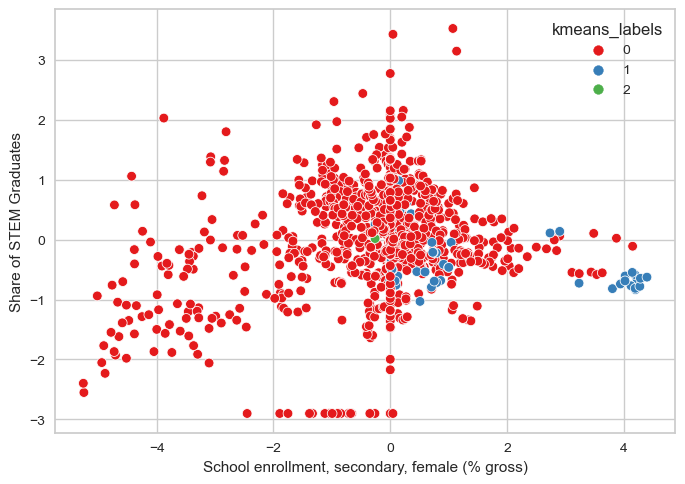

In [14]:
# Plot secondary school enrollment vs. STEM graduates and show cluster assignments
sns.scatterplot(data=X_ac, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates', hue='kmeans_labels',palette='Set1')

It's difficult to identify insights using this model because there are only 3 clusters, and the clusters appear to be overlap when considering these specific variables. 

#### Feature Engineering: Improve KMeans model using PCA Feature Selection

In [17]:
# Step 1: Initialize a model object
pca = PCA(random_state=seed)

# Step 2: Train the model
pca_data = pca.fit(X)

# Step 3: Get explained_variance_ratio_
pca_data.explained_variance_ratio_

array([7.64995373e-01, 1.60382685e-01, 6.57037623e-02, 3.58786056e-03,
       8.96428541e-04, 8.84748397e-04, 7.68956730e-04, 4.45364567e-04,
       4.11894664e-04, 3.51752114e-04, 3.01693897e-04, 2.35590167e-04,
       1.90999165e-04, 1.14244091e-04, 8.35628469e-05, 7.87323139e-05,
       6.42424597e-05, 5.39389829e-05, 4.60659559e-05, 3.87515075e-05,
       3.36077787e-05, 2.94905195e-05, 2.52151622e-05, 2.29698045e-05,
       2.24614392e-05, 2.00598562e-05, 1.84788102e-05, 1.69467049e-05,
       1.57804689e-05, 1.49369864e-05, 1.44726700e-05, 1.37521893e-05,
       1.32071351e-05, 1.03810040e-05, 9.77119403e-06, 9.67236699e-06,
       9.07606153e-06, 8.59562767e-06, 7.59796036e-06, 6.27154990e-06,
       5.97539557e-06, 5.38737901e-06, 4.89868327e-06, 4.50427877e-06,
       4.31580458e-06, 3.71415239e-06, 3.38292201e-06, 2.59703893e-06,
       1.82202543e-06, 1.58851676e-06, 1.00094260e-06, 9.25679828e-07,
       3.58123438e-07, 1.35865467e-07])

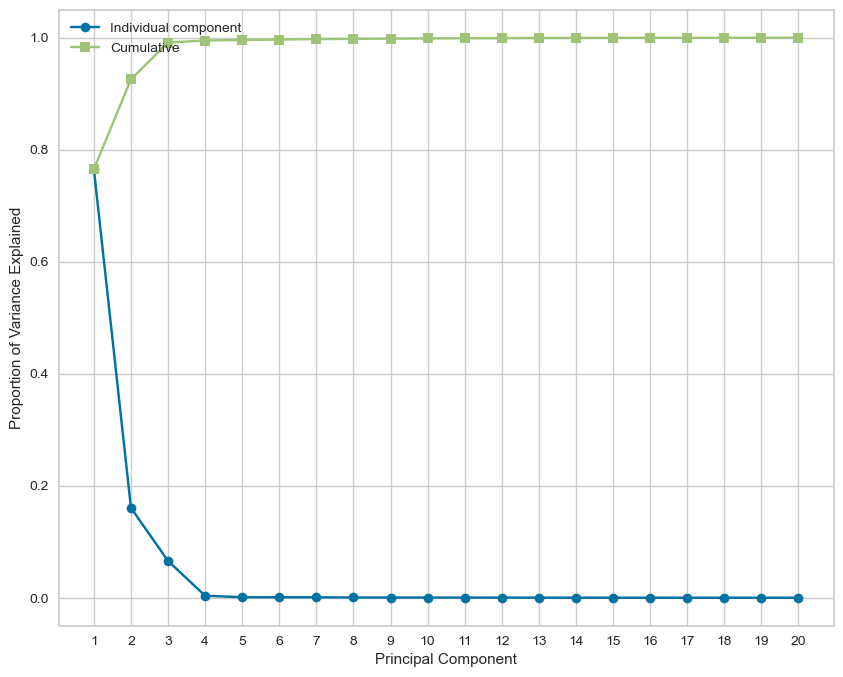

In [18]:
# Plot the variance explained ratios from the PCA to see how many components are needed to explain all of the features. 

pcidx = np.arange(1, 21)

plt.figure(figsize=(10, 8))

plt.plot(pcidx, pca_data.explained_variance_ratio_[:20], '-o', label='Individual component')
plt.plot(pcidx, np.cumsum(pca_data.explained_variance_ratio_[:20]), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xticks(pcidx)
plt.legend(loc=2)

In [19]:
# The plot appears to flatten after 5 components. Create a new dataframe that is a PCA subset with n_components=5

n_components = 5
pca = PCA(n_components=n_components, random_state=seed)
X_PCA = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3','PC4', 'PC5'], index=X.index)
X_PCA

,PC1,PC2,PC3,PC4,PC5
7,-23.423128,68.127128,1.879445,0.091303,0.633037
8,-23.417980,68.123583,1.872941,0.259550,0.178459
9,-23.416987,68.122602,1.872282,0.308590,-0.092632
10,-23.416311,68.119279,1.871690,0.409168,-0.097754
11,-23.422400,68.117412,1.884109,0.203108,0.034426
...,...,...,...,...,...
143509,-22.158622,-64.822171,0.375825,-3.381251,1.950134
144581,-22.155958,-65.794188,0.372510,-3.287604,3.901449
144582,-22.156668,-65.794354,0.372981,-3.281130,3.931401
144583,-22.164908,-65.808830,0.381143,-3.285881,4.475672


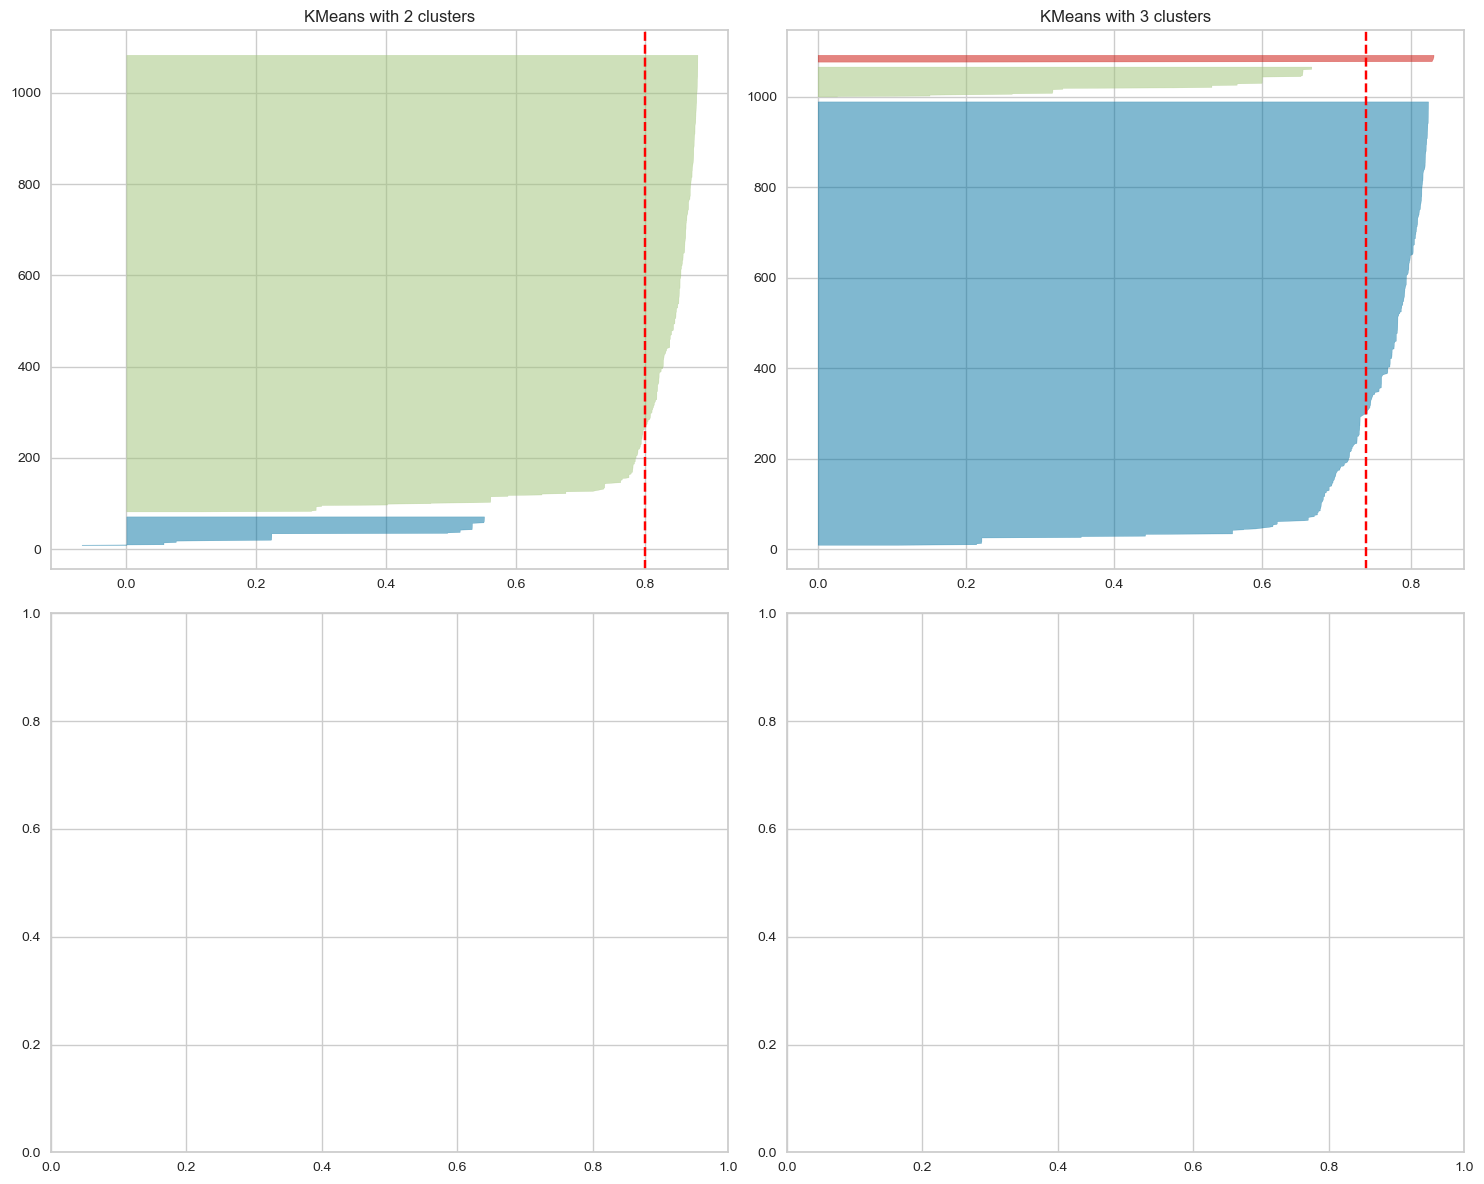

In [26]:
# Plot the silhouette plot again to see the optimal number of clusters with the PCA data

# Create a subplot grid
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
j = 0
h = 0

for i in range(2, 4):

    # Initialize the KMeans model
    model = KMeans(random_state=seed, n_clusters=i, n_init = 10)

    # Create a SilhouetteVisualizer for the current model
    viz = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[h][j])

    # Fit the visualizer
    viz.fit(X_PCA)

    # Set the title for each subplot
    ax[h][j].set_title(f'KMeans with {i} clusters')

    # Update the subplot position
    if j < 1:
        j += 1
    else:
        j = 0
        h += 1

# Show the plot
plt.tight_layout()
plt.show()

In [29]:
# Silhouette score is highest with 2 clusters. Run a Kmeans with 2 clusters to get "final" results. 


# Step 1: Initialize a model object
kmeans_final = KMeans(random_state=seed, n_clusters=2, n_init = 10)

# Step 2: Train the model using the X_test
kmeans_final = kmeans_final.fit(X_PCA)

# Step 3: Get predictions (cluster assignments)
y_pred_test_kmeans_final = kmeans_final.labels_

# Step 4: Evaluate the model performance
silhouette_score_test_kmeans_final = silhouette_score(X, y_pred_test_kmeans_final)

print('Silhouette score:', round(silhouette_score_test_kmeans_final, 3))

Silhouette score: 0.796


In [30]:
# Save the cluster assignments as a new columns in the dataset
X_ac["kmeans_pca_labels"] = y_pred_test_kmeans_final
X_ac

,Year,A woman can be head of household in the same way as a man (1=yes; 0=no),A woman can choose where to live in the same way as a man (1=yes; 0=no),A woman can get a job in the same way as a man (1=yes; 0=no),A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no),A woman can open a bank account in the same way as a man (1=yes; 0=no),A woman can register a business in the same way as a man (1=yes; 0=no),A woman can sign a contract in the same way as a man (1=yes; 0=no),A woman can travel outside her home in the same way as a man (1=yes; 0=no),A woman can work at night in the same way as a man (1=yes; 0=no),...,The law provides for the valuation of nonmonetary contributions (1=yes; 0=no),The mandatory retirement age for men and women is the same (1=yes; 0=no),There are periods of absence due to childcare accounted for in pension benefits (1=yes; 0=no),There is legislation specifically addressing domestic violence (1=yes; 0=no),There is paid parental leave (1=yes; 0=no),"Vocational and Technical enrolment (% of total secondary enrolment), total",Share of STEM Graduates,Country Label,kmeans_labels,kmeans_pca_labels
7,-0.3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.394159,1.074265,0,0,1
8,-0.1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.322957,1.161942,0,0,1
9,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.383511,1.307281,0,0,1
10,0.1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.388668,1.312005,0,0,1
11,0.5,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.000000,1.685997,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143509,0.8,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,-0.798411,0.890969,133,0,1
144581,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.000000,-1.181184,134,0,1
144582,0.1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.000000,-0.614411,134,0,1
144583,0.2,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.000000,-0.595872,134,0,1


<Axes: xlabel='School enrollment, secondary, female (% gross)', ylabel='Share of STEM Graduates'>

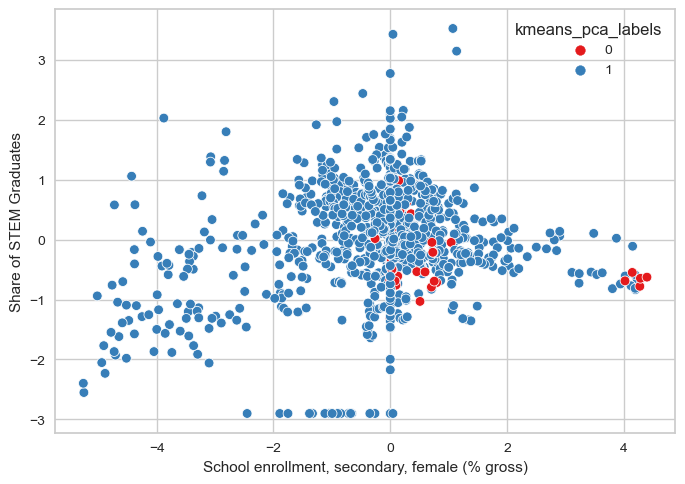

In [31]:
sns.scatterplot(data=X_ac, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates', hue='kmeans_pca_labels',palette='Set1')


There is still a fair amount of overlap in the clusters and interpreting the results to gather insights may be challenging. 

In [32]:
# # Calculate the overall variance of each feature
# overall_variance = X.var()

# # Initialize a DataFrame to store the vars for each cluster
# var_diffs = pd.DataFrame(columns=X.columns)

# # Calculate the variance within each cluster and compare with overall variance
# for cluster in range(kmeans_final.n_clusters):
#     cluster_data = X_ac[X_ac['kmeans_pca_labels'] == cluster]
#     cluster_variance = cluster_data.var()
#     var_calc = cluster_variance / overall_variance
#     var_diffs.loc[f'Cluster {cluster}'] = var_calc

# # Display the feature importance for each cluster
# print("Variance of each Feature per Cluster:")

# var_diffs

### Model 2: Agglomerative Clustering

Train an initial model using the original dataset (X)

In [35]:
# Step 1: Initialize a model object
agg_clustering = AgglomerativeClustering()

# Step 2: Train the model
agg_clustering.fit(X)

# Step 3: Get predictions (cluster assignments)
y_pred_train_agg_clustering = agg_clustering.labels_

# Step 4: Evaluate the model performance
silhouette_score_train_agg = silhouette_score(X, y_pred_train_agg_clustering)

print('Silhouette score:', round(silhouette_score_train_agg, 3))
print('Number of Clusters (default model):', round(agg_clustering.n_clusters_, 3))

Silhouette score: 0.864
Number of Clusters (default model): 2


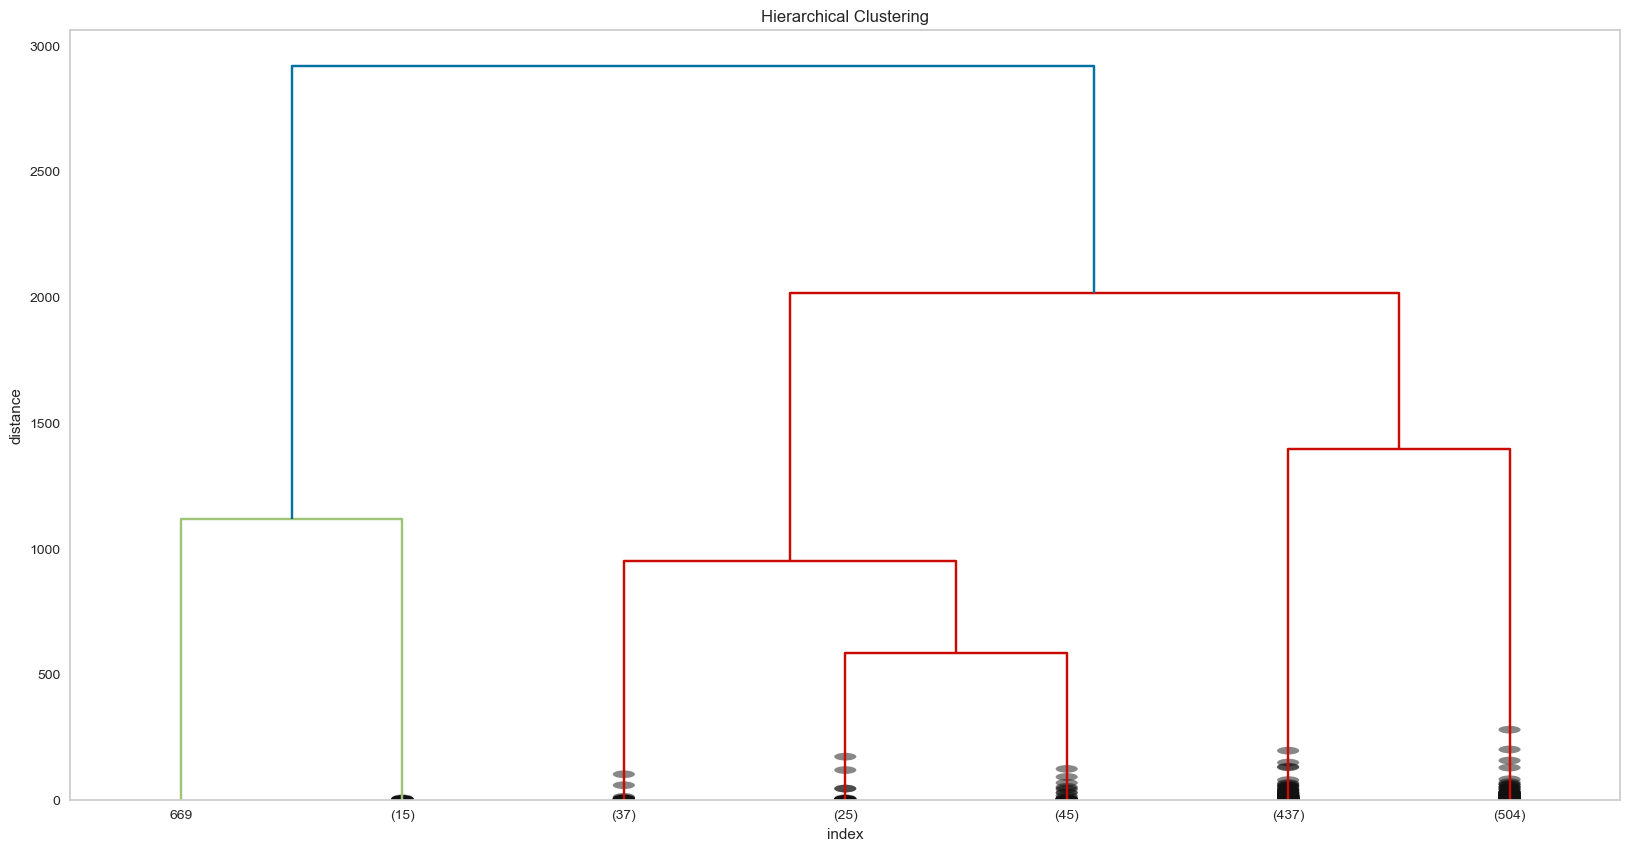

In [36]:
# Explore how many clusters to use using dendograms. Compare various linkage metrics. 

#ward linkage
Z = linkage(X,'ward')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

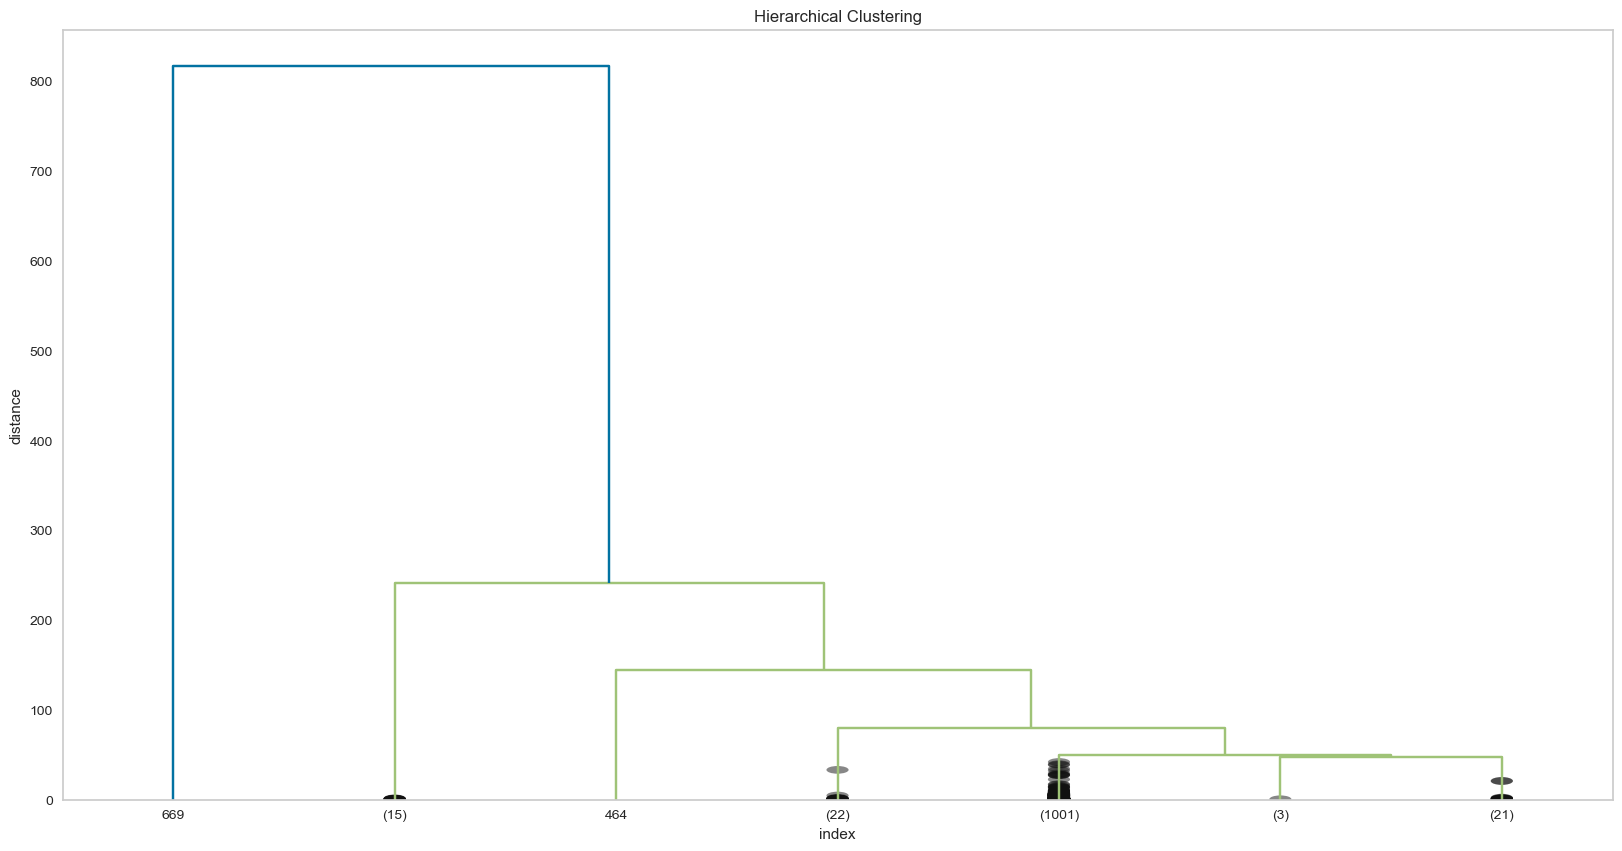

In [37]:
#single linkage
Z = linkage(X,'single')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

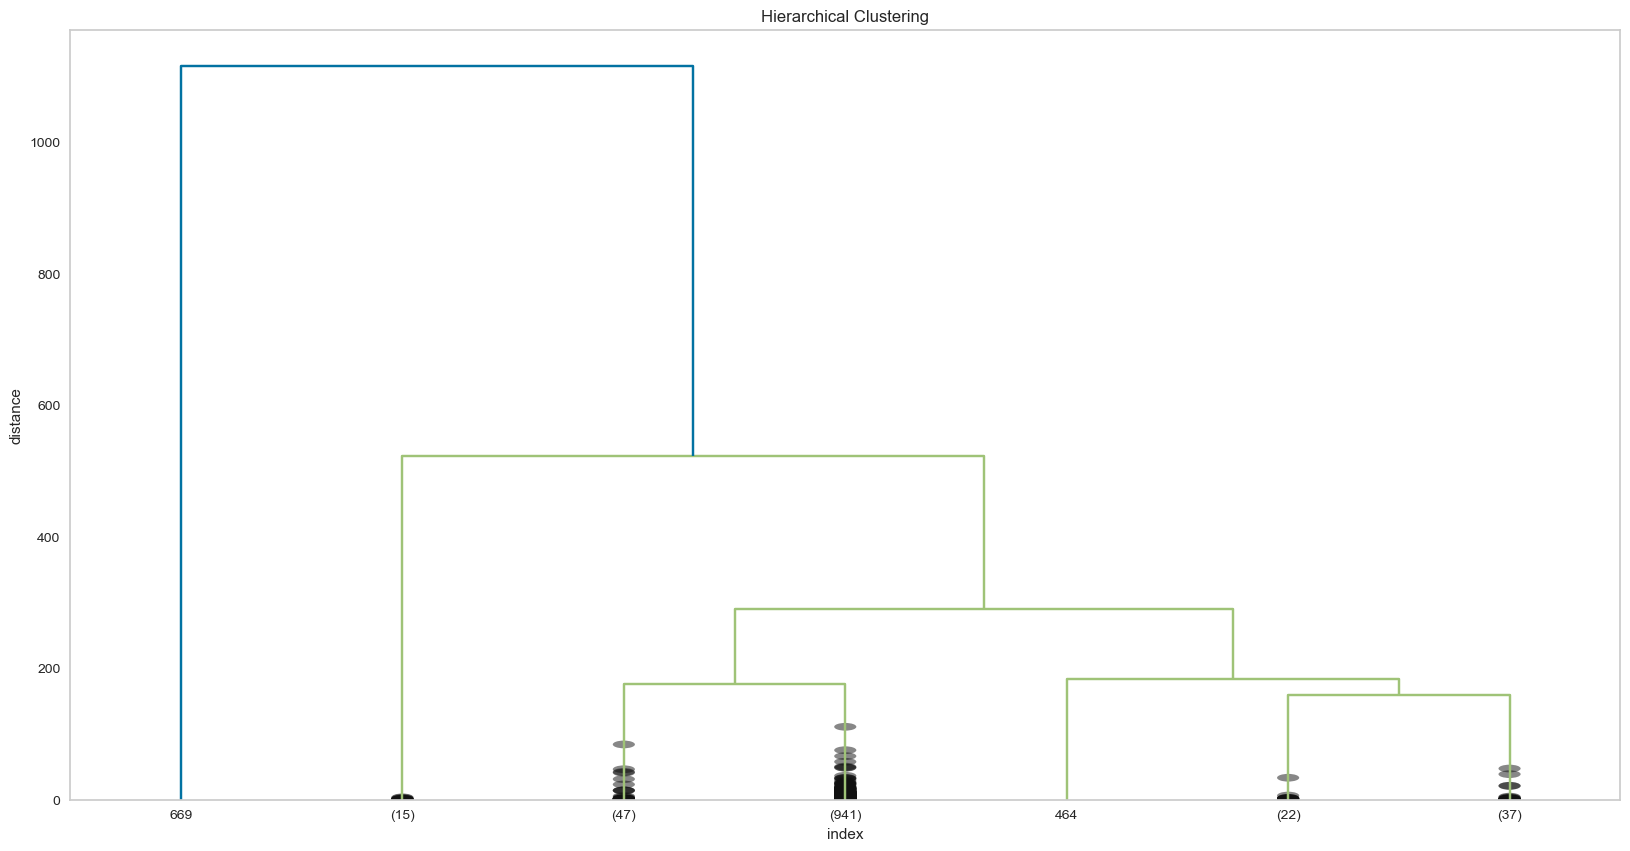

In [38]:
#complete linkage
Z = linkage(X,'complete')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

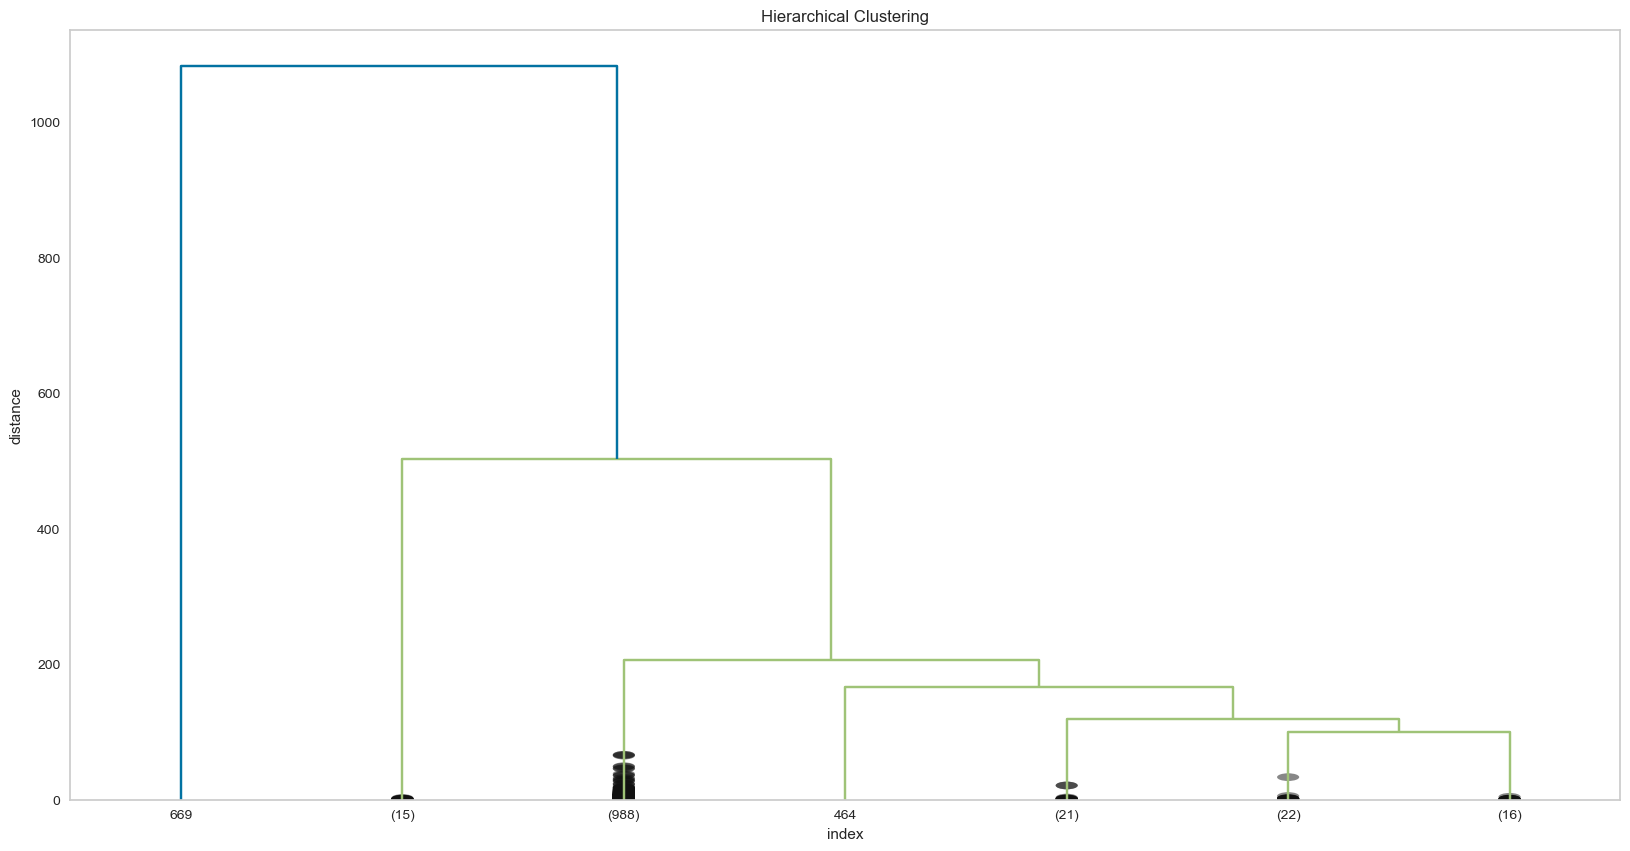

In [39]:
#avg linkage
Z = linkage(X,'average')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

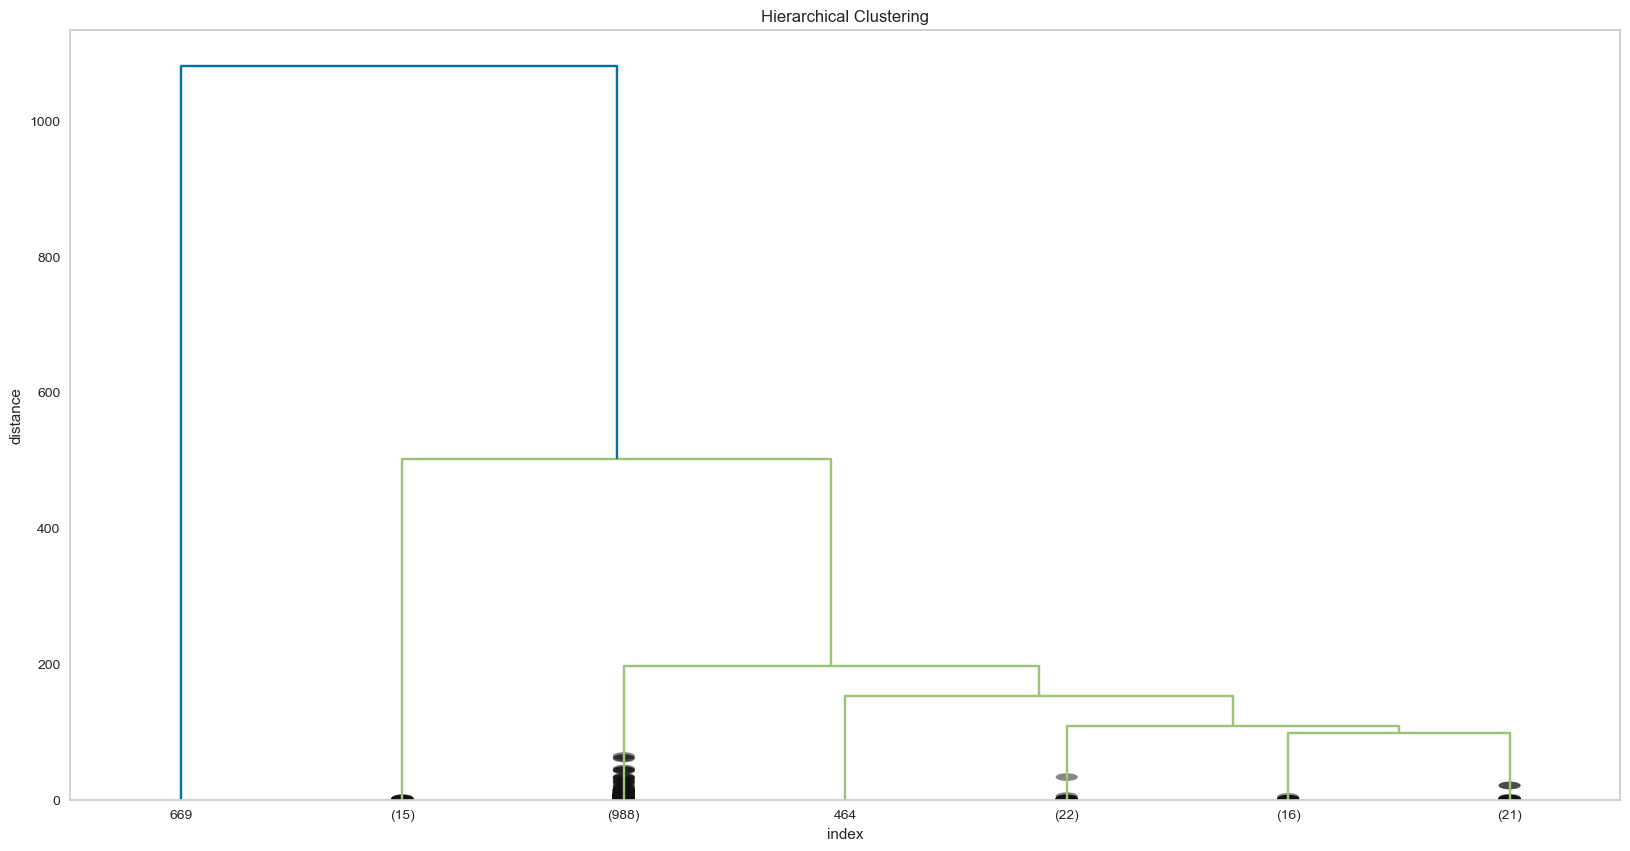

In [40]:
#centroid linkage
Z = linkage(X,'centroid')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

Most of the plots showed lowest distance around 7 or 8 clusters. 

Re-run the model using 7 clusters. 

In [42]:
# Step 1: Initialize a model object
agg_clustering_final = AgglomerativeClustering(n_clusters=7, linkage='ward')

# Step 2: Train the model using the X_test
agg_clustering_final.fit(X)

# Step 3: Get predictions (cluster assignments)
y_pred_test_agg_clustering_final = agg_clustering_final.labels_

# Step 4: Evaluate the model performance
silhouette_score_test_agg_clustering_final = silhouette_score(X, y_pred_test_agg_clustering_final, random_state=17)

print('Silhouette score:', round(silhouette_score_test_agg_clustering_final))

Silhouette score: 1


In [44]:
# Save cluster labels into results dataframe
X_ac["hc_labels"] = y_pred_test_agg_clustering_final
X_ac.head()

,Year,A woman can be head of household in the same way as a man (1=yes; 0=no),A woman can choose where to live in the same way as a man (1=yes; 0=no),A woman can get a job in the same way as a man (1=yes; 0=no),A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no),A woman can open a bank account in the same way as a man (1=yes; 0=no),A woman can register a business in the same way as a man (1=yes; 0=no),A woman can sign a contract in the same way as a man (1=yes; 0=no),A woman can travel outside her home in the same way as a man (1=yes; 0=no),A woman can work at night in the same way as a man (1=yes; 0=no),...,The mandatory retirement age for men and women is the same (1=yes; 0=no),There are periods of absence due to childcare accounted for in pension benefits (1=yes; 0=no),There is legislation specifically addressing domestic violence (1=yes; 0=no),There is paid parental leave (1=yes; 0=no),"Vocational and Technical enrolment (% of total secondary enrolment), total",Share of STEM Graduates,Country Label,kmeans_labels,kmeans_pca_labels,hc_labels
7,-0.3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.394159,1.074265,0,0,1,1
8,-0.1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.322957,1.161942,0,0,1,1
9,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.383511,1.307281,0,0,1,1
10,0.1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.388668,1.312005,0,0,1,1
11,0.5,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.000000,1.685997,0,0,1,1


<Axes: xlabel='Length of paid parental leave for mother (calendar days)', ylabel='GDP per capita (Current US$)'>

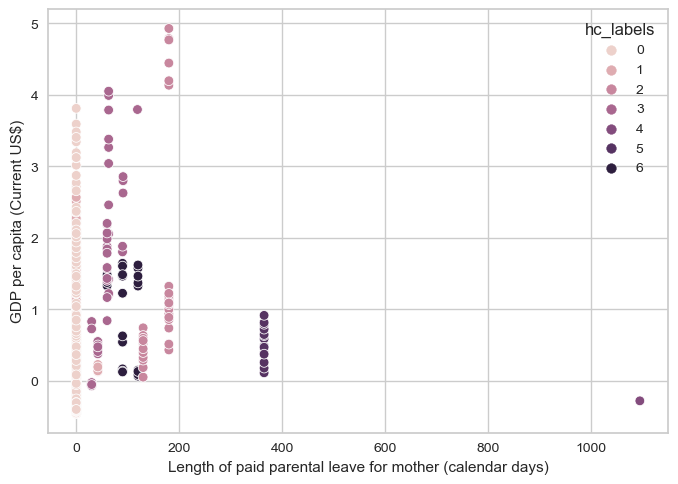

In [45]:
# Plot a few variables to see if the clustering seems to draw insight. 
sns.scatterplot(data=X_ac, y='GDP per capita (Current US$)', x='Length of paid parental leave for mother (calendar days)', hue='hc_labels')


<Axes: xlabel='School enrollment, secondary, female (% gross)', ylabel='Share of STEM Graduates'>

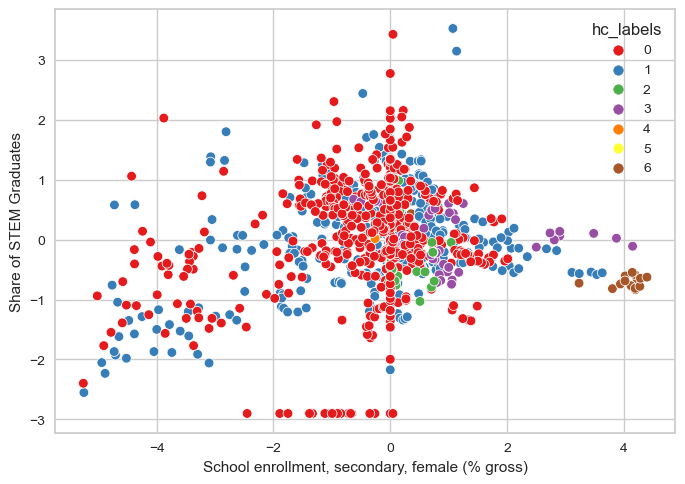

In [46]:
sns.scatterplot(data=X_ac, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates', hue='hc_labels',palette='Set1')

With 7 clusters, there seems to be more information that could be gained from the data. However, the cluster=0 is still very spread across the features as with previous models. 

/var/folders/gw/cl0r651n6y7fc7gtsnyjpc280000gn/T/ipykernel_60945/3611270463.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data = plot_data[X_withCountry['Country'].isin(unique_countries)]


<Axes: xlabel='School enrollment, secondary, female (% gross)', ylabel='Share of STEM Graduates'>

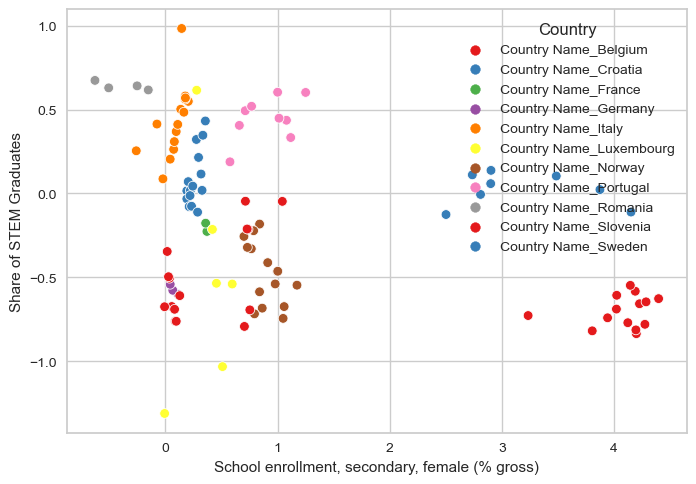

In [48]:
# Plot the country names and the cluster assignments for a few of the clusters identified above to see if anything can be learned from the clusters. 
X_withCountry['hc_labels'] = y_pred_test_agg_clustering_final

plot_data = X_withCountry[X_withCountry['hc_labels'].isin([2,3,6])]
unique_countries = plot_data['Country'].unique()

plot_data = plot_data[X_withCountry['Country'].isin(unique_countries)]

sns.scatterplot(data=plot_data, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates', hue='Country',palette='Set1')


It looks like a handful of European countries might be considered "outliers" when it comes to their school enrollment rates and/or STEM graduate rates. 

Slovenia also seems to have variation in their enrollment over time. 

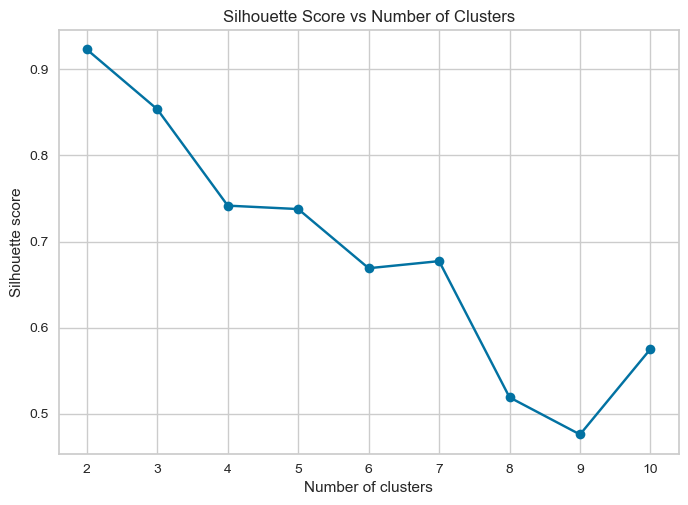

In [50]:
silhouette_scores = []
for n_clusters in range(2, 11):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters,linkage='average')
    cluster_labels = agg_clustering.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels, random_state=seed)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


#### Model 3: DBSCAN

In [61]:
# Step 1: Initialize a model object
dbscan = DBSCAN(eps=4, min_samples=2)

# Step 2: Train the model
dbscan.fit(X)

# Step 3: Get predictions (cluster assignments)
y_pred_train_dbscan = dbscan.labels_

# Save to results DF

X_ac["dbscan_labels"] = y_pred_train_dbscan

# Step 4: Evaluate the model performance
silhouette_score_train_dbscan = silhouette_score(X, y_pred_train_dbscan)

print('Silhouette score:', round(silhouette_score_train_dbscan, 3))

Silhouette score: 0.555


In [62]:
# Tune parameters & fit to X_PCA data. eps=12, min_samples=10

# Step 1: Initialize a model object
dbscan = DBSCAN(eps=12, min_samples=10)

# Step 2: Train the model
dbscan.fit(X_PCA)

# Step 3: Get predictions (cluster assignments)
y_pred_train_dbscan = dbscan.labels_

# Save to results DF
X_ac["dbscan_pca_labels"] = y_pred_train_dbscan

# Step 4: Evaluate the model performance
silhouette_score_train_dbscan = silhouette_score(X, y_pred_train_dbscan)

print('Silhouette score:', round(silhouette_score_train_dbscan, 3))

Silhouette score: 0.502


In [64]:
# How many data points were assigned to each cluster? 
X_ac['dbscan_pca_labels'].value_counts()

dbscan_pca_labels
 0    921
-1     86
 2     15
 3     15
 1     14
 4     13
Name: count, dtype: int64

<Axes: xlabel='School enrollment, secondary, female (% gross)', ylabel='Share of STEM Graduates'>

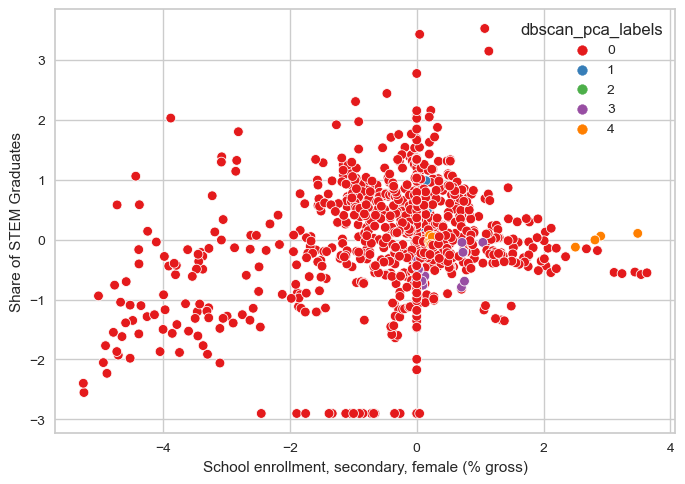

In [65]:
# Plot the cluster assignments for all clusters except -1, which indicates "noise"
data = X_ac[(X_ac['dbscan_pca_labels']!= -1)]

sns.scatterplot(data=data, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates', hue='dbscan_pca_labels',palette='Set1')

The assignment for cluster=0 is still dominant for most of the data and making it difficult to get insights from the results. 

/var/folders/gw/cl0r651n6y7fc7gtsnyjpc280000gn/T/ipykernel_60945/4171010089.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data = plot_data[X_withCountry['Country'].isin(unique_countries)]


<Axes: xlabel='School enrollment, secondary, female (% gross)', ylabel='Share of STEM Graduates'>

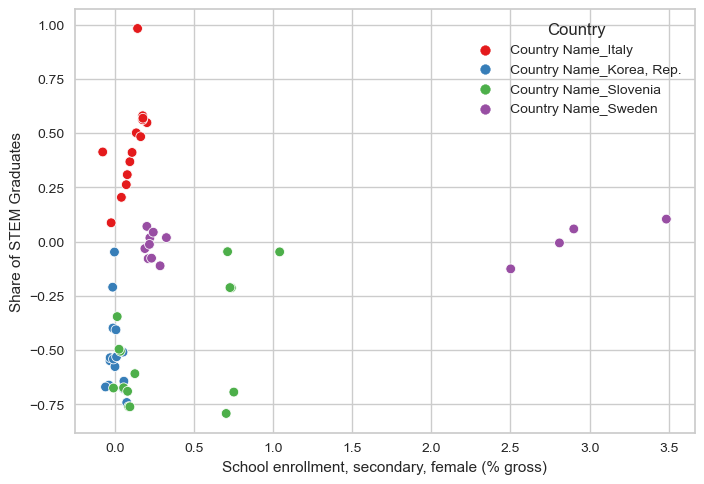

In [69]:
# Plot the country names and cluster assignments for data points in clusters 1, 2, 3, and 4, which are smaller clusters. 

X_withCountry['dbscan_pca_labels'] = X_ac['dbscan_pca_labels']

plot_data = X_withCountry[X_withCountry['dbscan_pca_labels'].isin([1,2,3,4])]
unique_countries = plot_data['Country'].unique()

plot_data = plot_data[X_withCountry['Country'].isin(unique_countries)]

sns.scatterplot(data=plot_data, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates', hue='Country',palette='Set1')


This plot interestingly is different from the Agg Clustering model, which had more countries clustered and all countries were in Europe. With the DBScan model, the Rep. of Korea is also included. 